In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [2]:
data = "/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv"
df = pd.read_csv(data)

In [3]:
# This checks for how many rows and columns the dataset contains
df.shape

(150000, 21)

In [4]:
#The code before checks the first few samples of the dataset
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
# This will remove any unnecessary warning, such as that displayed after I used the ".head" function
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Now i will use the same function again to prove that the warnings are ignored after importing and using the library
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [7]:
# This checks the last few samples on the dataset
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [8]:
# What are all the columns in the dataset
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [9]:
# What data types does each column in the dataset contain
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [10]:
'''
Now the data types are okay, except for the "Date" and "Time" columns, which were stored 
In the data type "Object" instead of their respective types, so I will change them. The best 
way to do that is by combining both the Date and Time into a single column, and converting the data
types, and then extracting the Hour, Day, and Weekday from the combined column, thus giving
us a more detailed dataset.
'''
# Combine Date + Time into one column
df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")

# Extract features
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day
df["Weekday"] = df["DateTime"].dt.day_name()

# Note: The "Date" and "Time" columns won't be dropped for further references

In [11]:
df.dtypes

Date                                         object
Time                                         object
Booking ID                                   object
Booking Status                               object
Customer ID                                  object
Vehicle Type                                 object
Pickup Location                              object
Drop Location                                object
Avg VTAT                                    float64
Avg CTAT                                    float64
Cancelled Rides by Customer                 float64
Reason for cancelling by Customer            object
Cancelled Rides by Driver                   float64
Driver Cancellation Reason                   object
Incomplete Rides                            float64
Incomplete Rides Reason                      object
Booking Value                               float64
Ride Distance                               float64
Driver Ratings                              float64
Customer Rat

In [12]:
# Let's check if any of the data values are duplicated
df.duplicated().sum()

0

In [13]:
# Now, I want to check if the dataset has any missing values
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
DateTime                                  0
Hour                            

In [14]:
# Let me confirm the percentage of the missing values to decide whether to drop them or impute them
df.isnull().mean()*100

Date                                  0.0
Time                                  0.0
Booking ID                            0.0
Booking Status                        0.0
Customer ID                           0.0
Vehicle Type                          0.0
Pickup Location                       0.0
Drop Location                         0.0
Avg VTAT                              7.0
Avg CTAT                             32.0
Cancelled Rides by Customer          93.0
Reason for cancelling by Customer    93.0
Cancelled Rides by Driver            82.0
Driver Cancellation Reason           82.0
Incomplete Rides                     94.0
Incomplete Rides Reason              94.0
Booking Value                        32.0
Ride Distance                        32.0
Driver Ratings                       38.0
Customer Rating                      38.0
Payment Method                       32.0
DateTime                              0.0
Hour                                  0.0
Day                               

In [15]:
# Now I can drop the irrelevant columns and those with a high missing percentage
drop_cols = [
    "Date", "Time", 
    "Cancelled Rides by Customer", "Reason for cancelling by Customer",
    "Cancelled Rides by Driver", "Driver Cancellation Reason",
    "Incomplete Rides", "Incomplete Rides Reason"
]
df.drop(columns=drop_cols, inplace=True)

'''
Note: I dropped the columns with a high missing percentage because they cannot be imputed.
If we do that, we will have a noisy and almost meaningless dataset. Imagine we impute the 
column with 94% missing values, this means only 6% is legit, whereas the rest aren't. So, the
best approach is to drop them if too many, and impute if moderate or very few.
'''

"\nNote: I dropped the columns with a high missing percentage because they cannot be imputed.\nIf we do that, we will have a noisy and almost meaningless dataset. Imagine we impute the \ncolumn with 94% missing values, this means only 6% is legit, whereas the rest aren't. So, the\nbest approach is to drop them if too many, and impute if moderate or very few.\n"

In [16]:
# Impute moderate missing numeric columns 
numeric_cols = ["Avg VTAT", "Avg CTAT", "Booking Value", "Ride Distance", "Driver Ratings", "Customer Rating"]
for col in numeric_cols:
    median_val = df[col].median()  # median is robust against outliers
    df[col].fillna(median_val, inplace=True)

# Impute moderate missing categorical columns 
categorical_cols = ["Payment Method"]
for col in categorical_cols:
    mode_val = df[col].mode()[0]  # most frequent value
    df[col].fillna(mode_val, inplace=True)

'''
Now, I used the median for the numeric data instead of the mean because it avoids skew from outliers,
and the mode for the categorical data previes the most likely category based on the frequency
'''

'\nNow, I used the median for the numeric data instead of the mean because it avoids skew from outliers,\nand the mode for the categorical data previes the most likely category based on the frequency\n'

In [17]:
# Now, I will confirm if there are any missing values
df.isnull().sum()

Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
Pickup Location    0
Drop Location      0
Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
Payment Method     0
DateTime           0
Hour               0
Day                0
Weekday            0
dtype: int64

In [18]:
# Importing more libraries for the visualization
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("pastel")

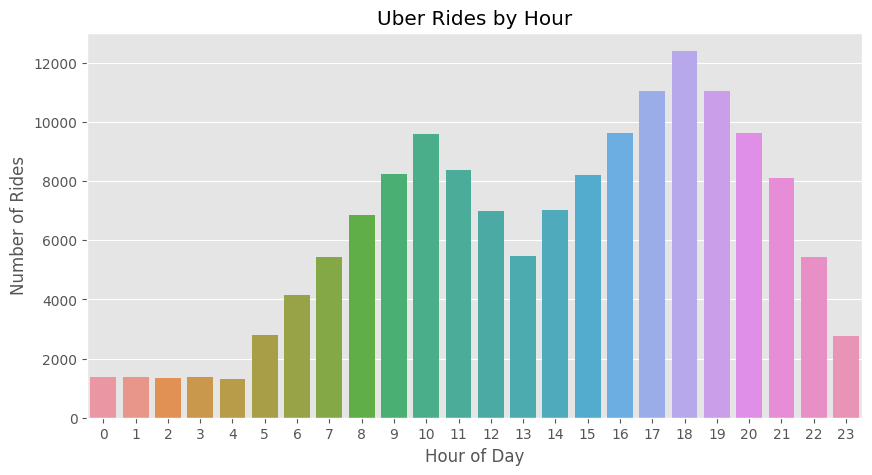

In [19]:
# Rides by Hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Uber Rides by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()


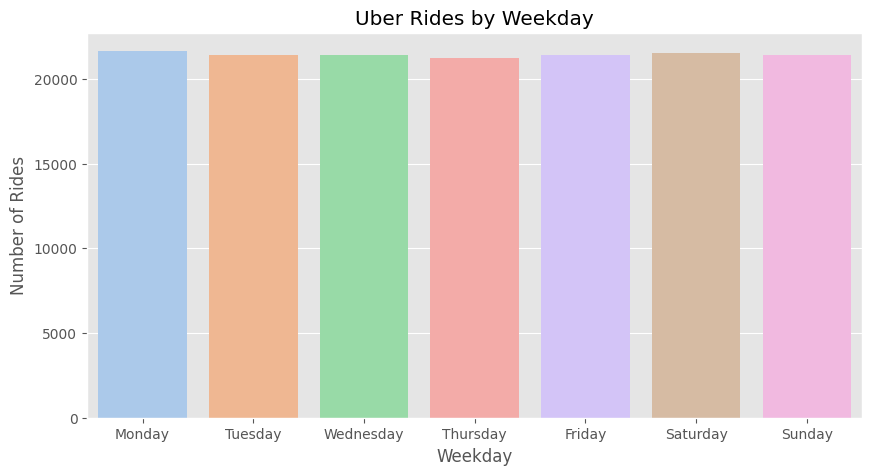

In [20]:
# Rides by Weekday
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Uber Rides by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.show()

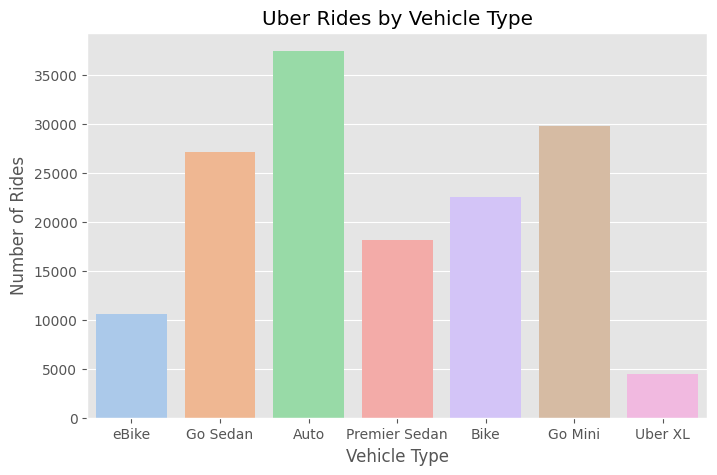

In [21]:
# Distribution of rides by Vehicle Type
plt.figure(figsize=(8,5))
sns.countplot(x='Vehicle Type', data=df)
plt.title("Uber Rides by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Rides")
plt.show()

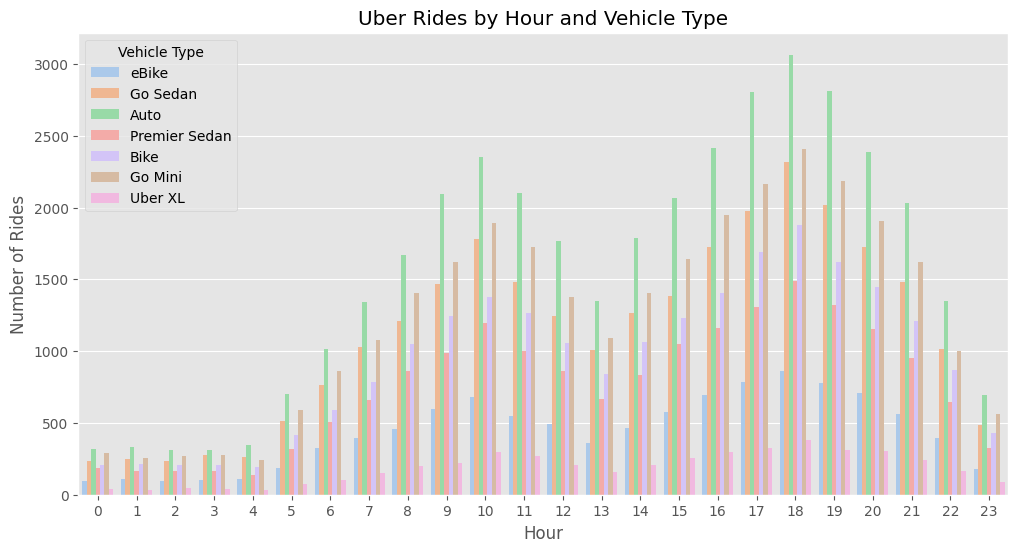

In [22]:
# Vehicle Type vs Hour (stacked pattern)
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='Vehicle Type', data=df)
plt.title("Uber Rides by Hour and Vehicle Type")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.legend(title='Vehicle Type')
plt.show()